# Computer Vision - P3


## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **english**.

- The deliverable must be a file named **P3_Student1_Student2.zip** that includes:
    - The notebook P3_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): November 10th, 23:00 h** 

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics are:

In Video Segmentation:

3.1. Segmentation of video shots with static scenes.

3.2. Background substraction.

In Image Segmentation:

3.3. Segmentation of images.

To successfuly complete this practicum it is necessary to understand the following theory concepts: video segmentation, background substraction, K-means clustering, different image segmentation approaches,...

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.



## Video segmentation

Given the video stored in ‘Barcelona-sequence’, which contains images acquired by a static camera, we ask you to:
- Find the temporal segments of the video (shots). Where the scene change? (Section 3.1)
- Extract the background images and thus, remove all the "artifacts" considered as foreground related to movement. (Section 3.2)


Note: One of the applications of the backgroun substraction methods is the button "remove tourists" implemented in most commercial photo cameras. For instance, Adobe uses the "Monument Mode", which automatically deletes the people going by the cameras.

Today, most of videoconference tools allow to put a virtual background. Thus, they need to extract the person (the foreground) and to put it on the new virtual background.


## 3.1 Segmentation of video shots

Read and visualize the sequence of images "images/Barcelona-sequence".

Hint: In order to read a collection of images, we wil use the function [animation.FuncAnimation](https://matplotlib.org/2.0.0/api/_as_gen/matplotlib.animation.FuncAnimation.html).

Observe in the following Example, how FuncAnimation is used to read and visualize a sequence of frames. Explore the parameters of animation.FuncAnimation().

In [ ]:
%matplotlib inline

In [4]:
import numpy as np
import skimage
from skimage import io, img_as_float
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.exposure import histogram
from skimage.color import rgb2gray
ic = io.ImageCollection('images/Barcelona-sequence/*.png')
        # Reading a sequence of images from a folder

In [ ]:
%matplotlib nbagg 
#Changing the pluggin is necessary always when visualizing a video!

fig = plt.figure()  # Create figure
im = plt.imshow(ic[0], animated=True) #Visualize the first image

def updatefig1(i):   #Updating the frame visualization
    im.set_array(ic[i*5]) #Changing the content of the canvas
    return im, #to return a tuple!

plt.show()
ani = animation.FuncAnimation(fig, updatefig1, interval=5, blit=True, frames=50, repeat= False)
plt.show()

a) Find where a shot (scene) finishes and the following starts (boundaries). Each of the scenes in a video is usually called 'shot'. 

To solve this exercise, you need to create a **temporal plot** showing a frame by frame measure to be defined by you, being applicable to distinguish the shots. Define a criterion to detect the boundaries of the shots and visualize it in a static plot.

In [5]:
# We define a function that takes an image,
# converts it into float and returns its
# three histograms (one for each RGB channel)

def data(image, nbins):
    image = img_as_float(image)
    return [histogram(image[:, :, rgb], nbins)[0] for rgb in range(3)]

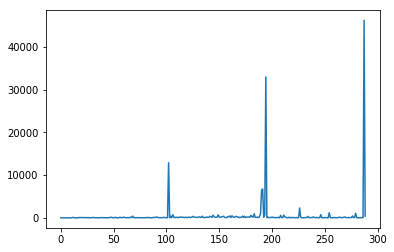

In [6]:
# We define a function that shows a
# temporal plot of the mean of the 
# differences between each of the 
# histograms (three, one for each RGB 
# channel) of a frame and its following

def temporal_plot(images):

    y = []

    for i in range(len(images) - 1):
        difference = [abs(data(images[i], 8)[rgb] - data(images[i+1], 8)[rgb]) for rgb in range (3)]
        y.append(np.mean(difference))
    
    plt.plot(y)
    plt.show()

temporal_plot(ic)

Additionally, create an interactive plot executing the following code in "Example A". This created **temporal plot** should replace the temporal plot given as a template. 

In [ ]:
%matplotlib nbagg 

def data_gen():
    
    # We keep the values of the histograms
    # we are generating of each frame 
    # inside the list "h" so we can access
    # the previous values on the way
    h = []
    
    t = data_gen.t
    cnt = 0
    
    while cnt < 1000:
        
        # We create the histogram of the "cnt" frame 
        # of our "ic" video
        hist = data(ic[cnt], 8)
        mean = 0
        
        # If there are previous histograms in our "h" list
        if len(h) > 0:
            
            # We calculate the difference between the three
            # channels of the current (the one we've just created) 
            # and the previous histogram (the last one in the "h" list)
            
            difference = [abs(hist[rgb] - h[-1][rgb]) for rgb in range (3)]
            
            # And we obtain the differences mean
            mean = np.mean(difference)
        
        # We put the current histogram inside the "h" list
        # to be able to use it in the next iteration
        h.append(hist)     
        
        cnt+=1
        t += 0.05
        
        # The value to plot corresponds to the mean of the
        # differences between each of the three histograms 
        # (one for each channel) of the current and the
        # previous frames
        y = mean

        yield t, y

data_gen.t = 0

%matplotlib nbagg

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# intialize a line object on the second axes for plotting
line, = ax2.plot([], [], lw=2, color='r')

ax2.set_ylim(-1.1, 46186.5) # We change the upper limit for the maximum difference found
ax2.set_xlim(0, 15) # We change the limit for "15" so our values can fit in the plot
ax2.grid()

# initialize the data arrays 
xdata, ydata = [], []
def run(data):
    # update the data plot
    t, y = data
    xdata.append(t) # time = x axis
    ydata.append(y) # y axis

    # Plot image on top row
    ax1.imshow(ic[len(xdata)])
          
    # Plot sin in bottom row
    xmin, xmax = ax2.get_xlim()
    if t >= xmax:
        ax2.set_xlim(xmin, 2*xmax)
        ax2.figure.canvas.draw()
            
    # update the data of both line objects
    line.set_data(xdata, ydata)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10, repeat=False)
plt.show()

b) Show the initial and final images of each shot extracted as follows:

<img src="images_for_notebook/result_shot_detection.png">


**Hint:**
Use the previous plot to define the proper threshold value over the differences of histograms. Use the threshold to localize the initial and final frames.


In [10]:
# The function "get_scenes" returns the 
# list containing the indexes of the first and last 
# frames of each of the different scenes

# When the mean of the differences between
# the three histograms (one for each RGB channel)
# of a frame and its previous (or following)
# is bigger, by default, than 10000 (value  
# chosen by observing the transition between scenes
# in the temporal plot)

def get_scenes(images, threshold = 10000): 
    scenes = [0]
    for i in range(2, len(images)):
        difference = [abs(data(images[i], 8)[rgb] - data(images[i-1], 8)[rgb]) for rgb in range (3)]
        
        if np.mean(difference) > threshold:
            scenes.append(i - 1)
            scenes.append(i)  
            
    # We get the last frame
    scenes.append(i)
    
    return scenes

In [8]:
# The function "show_scenes" takes the indexes 
# of the key frames (when a shot begins or ends)
# we can get with the function "get_scenes" 
# and shows the corresponding frames

def show_scenes(scenes, images):
    
    fig = plt.figure(figsize=(8,12))
    for p in range(len(scenes)):

        ax = fig.add_subplot(len(scenes)//2, 2, p + 1)
        plt.imshow(images[scenes[p]])

        if p % 2 == 0:
            ax.title.set_text("Begin of scene")
        else:
            ax.title.set_text("End of scene")

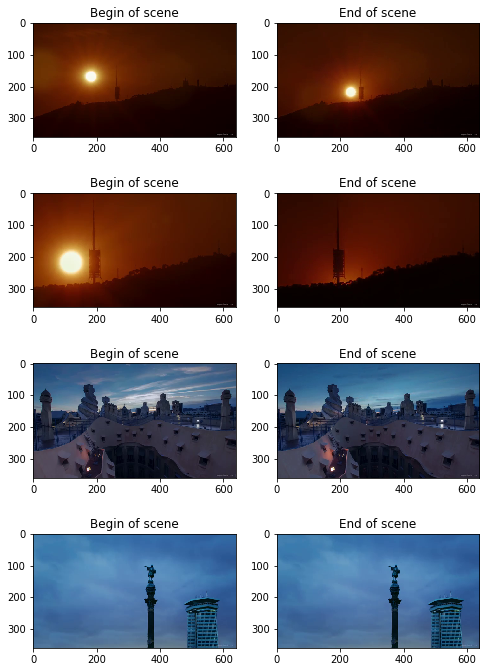

In [9]:
scenes = get_scenes(ic)
show_scenes(scenes, ic)

c) Which measure have you used in order to visually distinguish the shots in a plot? Explain your solution.

#### Answer to c)

We've calculated the mean of the difference between the three histograms (one for each RGB channel) of a frame and its following. We can see that the difference right when the shot changes is considerably big (as we've checked in the temporal plot, at least bigger than 10000). 

The implementation of our solution, which follows this main idea, is properly commented in the code. 

d) Would your video segmentation strategy be able to capture continuous transition? Argue your answer.

#### Answer to d)

No, it wouldn't. The reason why is because our method only contemplates a "drastic" change in the scene (a considerable difference between the consecutive histograms). If the video had a continuous transition, the difference between each immediate frame would be much insignificant, and so our method couldn't tell.  

e) Would your video segmentation strategy be able to separate and track objects? Argue your answer.

#### Answer to e)
No. Our video segmentation is mainly based on the differences between histograms, and histograms can't give us any spacial information, for it's only a graphical representation of the tonal distribution of an image. In order to do so, we should take account of spatial coordinates along with the intensity values we've already considered. 

## 3.2 Background subtraction

Apply the background subtraction algorithm (check theory material).

a) Visualize the following images for each different scene (there are 3) of the video:

    1) images belonging to the shot
    2) the background image, and
    3) the foreground.
    
**Hint**: You can construct a mask obtained from the original image and the background in order to know which parts of the image form part from the foreground and recover from the original image just the foreground regions.

In [11]:
# Function to show the original image and the background and foreground 
def plot_imgs(img1, img2, img3, scene_num):
    # We create a subplot for the initial and final image of the shot
    fig, axarr = plt.subplots(1,3, figsize=(15,15))
    fig.set_size_inches(15,10)
    
    # We add the initial image setting the title and removing the axis numeration
    axarr[0].imshow(img1, cmap='gray') 
    axarr[0].set_title("Original Image " + str(scene_num))    
    
    # We add the final image setting the title and removing the axis numeration
    axarr[1].imshow(img2, cmap='gray') 
    axarr[1].set_title("Background Image " + str(scene_num))    
    
    axarr[2].imshow(img3, cmap="gray") 
    axarr[2].set_title("Foreground Image " + str(scene_num))
    plt.axis('off')
    plt.axis('off')
    plt.axis('off')
    plt.show() 

In [12]:
def get_background_foreground(images,start, finish, threshold = 0.1):
    # We create a black background
    background = np.zeros(images[0].shape)
    
    frames = []
    # List to save float images to each channel
    frames_channels = [[],[],[]]
    
    for i in range(start, finish+1):
        frames.append(img_as_float(images[i]))
        
        for j in range(3):
            frames_channels[j] += [img_as_float(images[i][:, :, j])]
    
    for i in range(3):
        background[:,:,i] = np.median(frames_channels[i], axis=0)
    
    foreground = np.abs(frames[0] - background)
    
    foreground_gray = rgb2gray(foreground)
    # Binarizating foreground
    foreground_gray[foreground_gray <= threshold] = 0
    foreground_gray[foreground_gray > threshold] = 1
    
    foreground_gray = rgb2gray(foreground)
    
    return background, foreground, foreground_gray

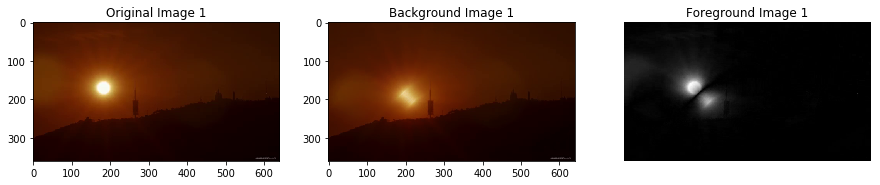

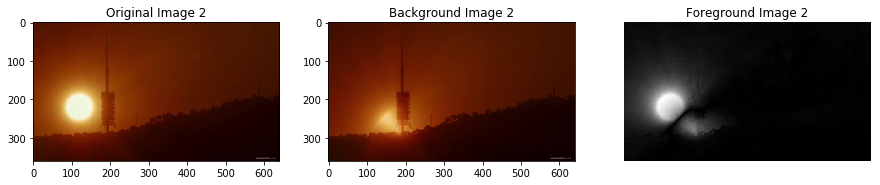

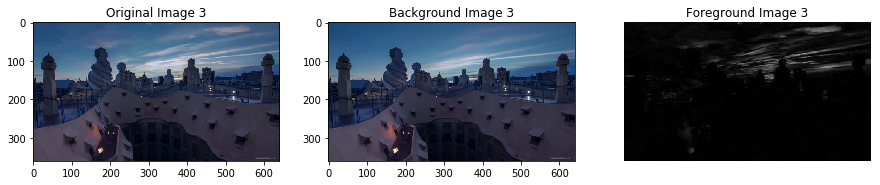

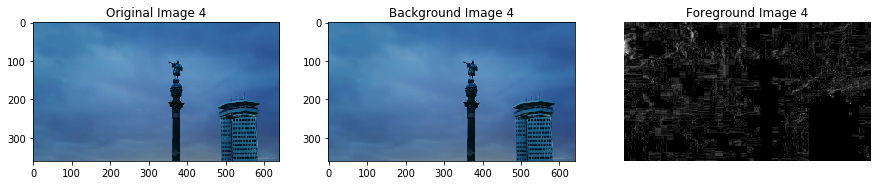

In [14]:
%matplotlib inline

num = 1
scenes = get_scenes(ic, 10000)
for i in range(0, len(scenes), 2):
    bg, fg, aux = get_background_foreground(ic, scenes[i], scenes[i+1], 0.2)
    plot_imgs(ic[scenes[i]], bg, aux, num)
    num += 1

b) Comment your implementation including details. 

c) Answer the following questions:
- What happens if the shots are not correctly extracted? 
- What happens if you find too many shots in the video? 
- What do the static background images represent? 
- In which situations does the algorithm work and in which it does not? 
- What happens if you substract the background image from the original one?
- Do you see any additional application for this algorithm?

d) **[OPTIONAL]**
- Apply the algorithm to some other static video that you found.

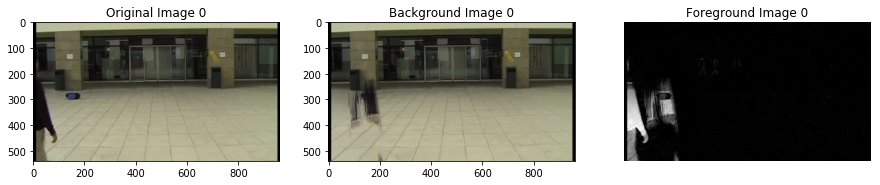

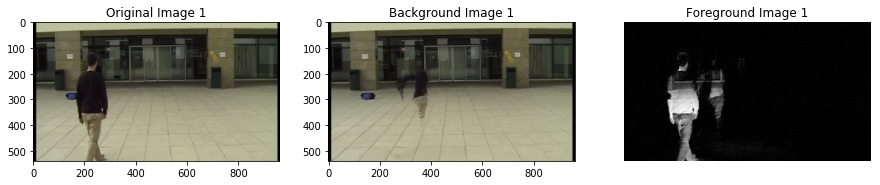

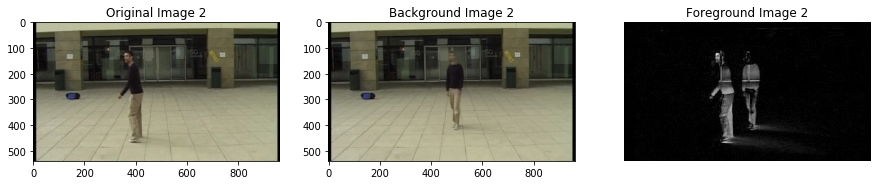

In [15]:
%matplotlib inline

ic2 = io.ImageCollection('images/epfl-sequence/*.png')

scenes = get_scenes(ic2, 22120)
num = 0
for i in range(0, len(scenes), 2):
    bg, fg, aux = get_background_foreground(ic2, scenes[i], scenes[i+1], 0.2)
    plot_imgs(ic2[scenes[i]], bg, aux, num)
    num += 1

In [ ]:
%matplotlib inline

ic2 = io.ImageCollection('images/epfl-sequence/*.png')

scenes = get_scenes(ic2, 22120)
num = 0
for i in range(0, len(scenes), 2):
    bg, fg, aux = get_background_foreground(ic2, scenes[i], scenes[i+1], 0.2)
    plot_imgs(ic2[scenes[i]], bg, aux, num)
    num += 1

## 3.3 Segmentation of images

Apply different clustering methods for image segmentation on the RGB-XY space.

**Hint**: 
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline)

a) Read 'loro.png' image from the folder 'images' and segment it using Felzenszwalbs's method. 


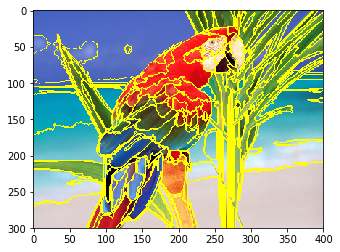

In [16]:
%matplotlib inline

from skimage.segmentation import felzenszwalb, mark_boundaries, slic, quickshift
loro = io.imread("images/loro.png")
loro_segmented = felzenszwalb(loro, scale=100, sigma=0.5, min_size=50)
plt.imshow(mark_boundaries(loro, loro_segmented))

b) Test different parameters in order to obtain a good image segmentation. 
Answer the following qüestions:
- Which are the optimal values?
- How does each parameter behave?


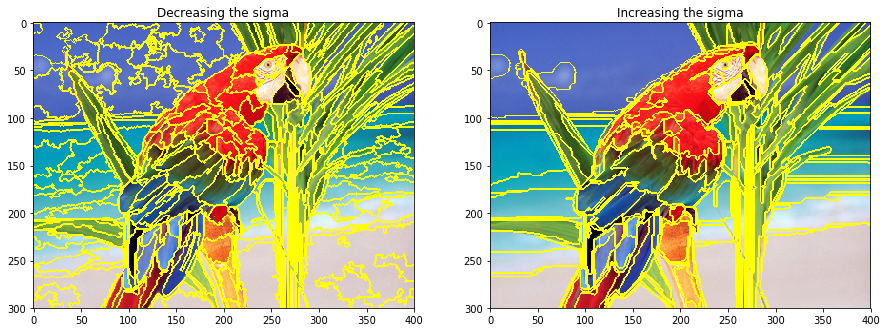

In [17]:

# Modifying the "sigma" parameter

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(1,2,1)
loro_segmented_1_1 = felzenszwalb(loro, scale=100, sigma=0.1, min_size=50)
plt.imshow(mark_boundaries(loro, loro_segmented_1_1))
ax.title.set_text("Decreasing the sigma")

ax = fig.add_subplot(1,2,2)
loro_segmented_1_2 = felzenszwalb(loro, scale=100, sigma=1, min_size=50)
plt.imshow(mark_boundaries(loro, loro_segmented_1_2))
ax.title.set_text("Increasing the sigma")

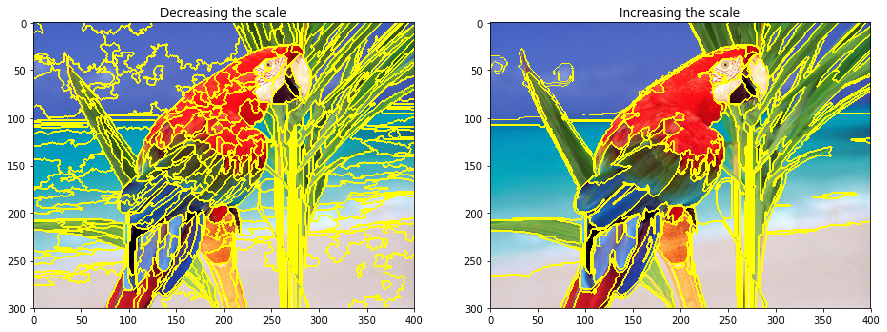

In [18]:
# Modifying the "scale" parameter
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(1,2,1)
loro_segmented_2_1 = felzenszwalb(loro, scale=20, sigma=0.5, min_size=50)
plt.imshow(mark_boundaries(loro, loro_segmented_2_1))
ax.title.set_text("Decreasing the scale")

ax = fig.add_subplot(1,2,2)
loro_segmented_2_2 = felzenszwalb(loro, scale=200, sigma=0.5, min_size=50)
plt.imshow(mark_boundaries(loro, loro_segmented_2_2))
ax.title.set_text("Increasing the scale")

c) Comment what algorithm is the method based in up to 3 lines most.

d) Segment the same image using SLIC algorithm. 

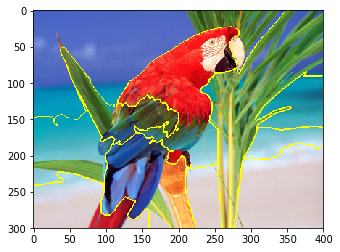

In [19]:
loro_slic = slic(loro, n_segments=20, compactness=0.1, sigma=1)
plt.imshow(mark_boundaries(loro, loro_slic))

e) Test different parameters in order to obtain a good image segmentation with SLIC algorithm.
Answer the following qüestions:
- Which are the optimal values?
- How does each parameter behave?

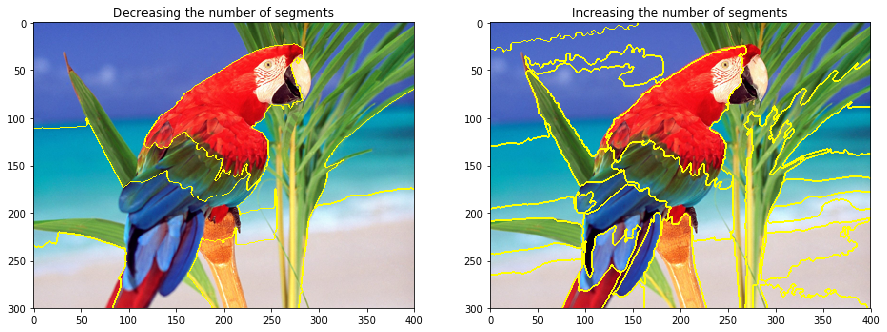

In [20]:
# Modifying the "n_segments" parameter

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(1,2,1)
loro_slic_1_1 = slic(loro, n_segments=10, compactness=0.1, sigma=1)
plt.imshow(mark_boundaries(loro, loro_slic_1_1))
ax.title.set_text("Decreasing the number of segments")

ax = fig.add_subplot(1,2,2)
loro_slic_1_2 = slic(loro, n_segments=50, compactness=0.1, sigma=1)
plt.imshow(mark_boundaries(loro, loro_slic_1_2))
ax.title.set_text("Increasing the number of segments")

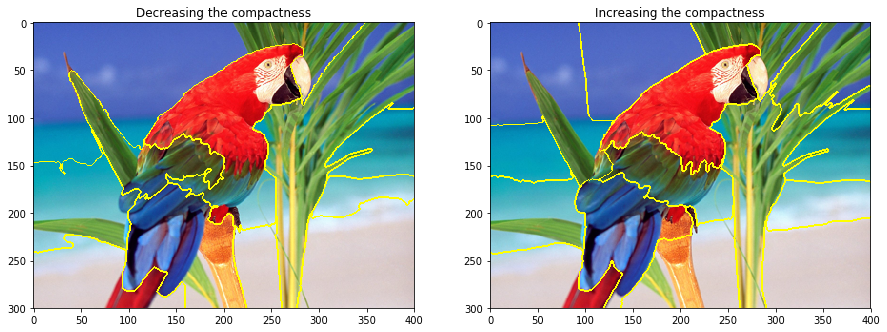

In [21]:
# Modifying the "compactness" parameter

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(1,2,1)
loro_slic_2_1 = slic(loro, n_segments=20, compactness=0.05, sigma=1)
plt.imshow(mark_boundaries(loro, loro_slic_2_1))
ax.title.set_text("Decreasing the compactness")

ax = fig.add_subplot(1,2,2)
loro_slic_2_2 = slic(loro, n_segments=20, compactness=20, sigma=1)
plt.imshow(mark_boundaries(loro, loro_slic_2_2))
ax.title.set_text("Increasing the compactness")

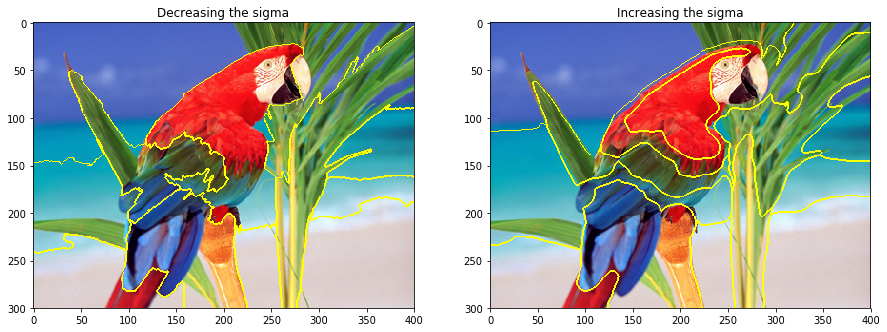

In [22]:
# Modifying the "sigma" parameter

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(1,2,1)
loro_slic_3_1 = slic(loro, n_segments=20, compactness=0.1, sigma=0.5)
plt.imshow(mark_boundaries(loro, loro_slic_3_1))
ax.title.set_text("Decreasing the sigma")

ax = fig.add_subplot(1,2,2)
loro_slic_3_2 = slic(loro, n_segments=20, compactness=0.1, sigma=5)
plt.imshow(mark_boundaries(loro, loro_slic_3_2))
ax.title.set_text("Increasing the sigma")

f) Segment the same image using the Quickshift algorithm. 

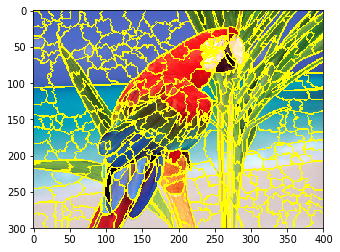

In [23]:
loro_quick = quickshift(loro, kernel_size=3, max_dist=6, ratio=0.5) 
plt.imshow(mark_boundaries(loro, loro_quick))

g) Test different parameters in order to obtain a good image segmentation with Quickshift algorithm.
Answer the following qüestions:
- Which are the optimal values?
- How does each parameter behave?

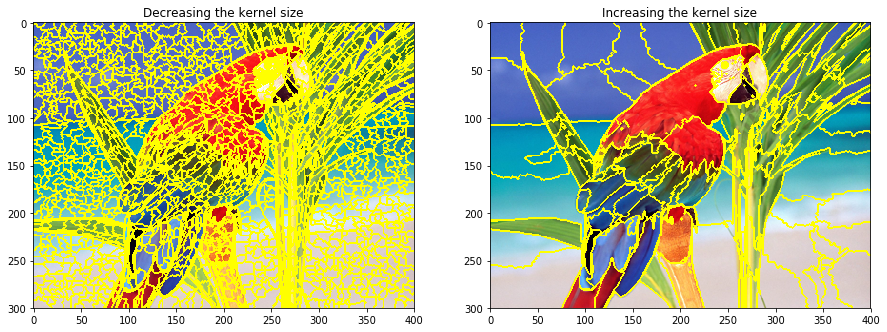

In [24]:
# Modifying the "kernel_size" parameter

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(1,2,1)
loro_quick_1_1 = quickshift(loro, kernel_size=1, max_dist=6, ratio=0.5) 
plt.imshow(mark_boundaries(loro, loro_quick_1_1))
ax.title.set_text("Decreasing the kernel size")

ax = fig.add_subplot(1,2,2)
loro_quick_1_2 = quickshift(loro, kernel_size=10, max_dist=6, ratio=0.5) 
plt.imshow(mark_boundaries(loro, loro_quick_1_2))
ax.title.set_text("Increasing the kernel size")

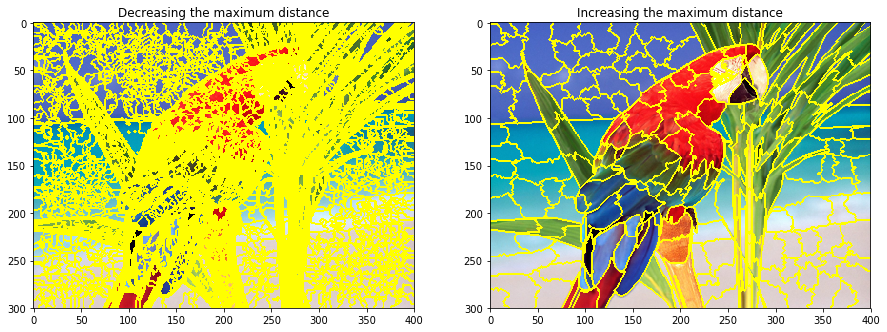

In [25]:
# Modifying the "max_dist" parameter

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(1,2,1)
loro_quick_1_1 = quickshift(loro, kernel_size=3, max_dist=2, ratio=0.5) 
plt.imshow(mark_boundaries(loro, loro_quick_1_1))
ax.title.set_text("Decreasing the maximum distance")

ax = fig.add_subplot(1,2,2)
loro_quick_1_2 = quickshift(loro, kernel_size=3, max_dist=15, ratio=0.5) 
plt.imshow(mark_boundaries(loro, loro_quick_1_2))
ax.title.set_text("Increasing the maximum distance")

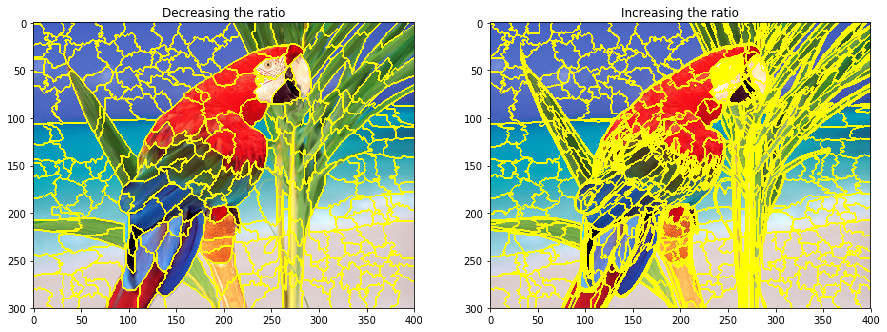

In [26]:
# Modifying the "ratio" parameter

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(1,2,1)
loro_quick_1_1 = quickshift(loro, kernel_size=3, max_dist=6, ratio=0.1) 
plt.imshow(mark_boundaries(loro, loro_quick_1_1))
ax.title.set_text("Decreasing the ratio")

ax = fig.add_subplot(1,2,2)
loro_quick_1_2 = quickshift(loro, kernel_size=3, max_dist=6, ratio=1) 
plt.imshow(mark_boundaries(loro, loro_quick_1_2))
ax.title.set_text("Increasing the ratio")

h) Comment what algorithm is the method based in up to 3 lines.

i) Plot the original image and the results of both algorithms in a 1x3 subplot. 



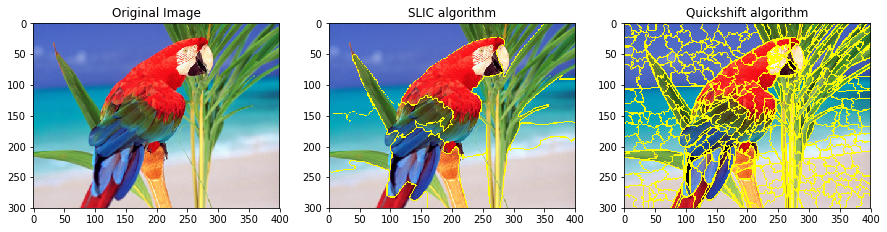

In [27]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(1,3,1)
plt.imshow(loro)
ax.title.set_text("Original Image")

ax = fig.add_subplot(1,3,2)
plt.imshow(mark_boundaries(loro, loro_slic))
ax.title.set_text("SLIC algorithm")

ax= fig.add_subplot(1,3,3)
plt.imshow(mark_boundaries(loro, loro_quick))
ax.title.set_text("Quickshift algorithm")

j) Calculate also the number of segments obtained on the image by each of the algorithms. 

k) Comment the differences between each method as well as their advantages and disadvantages.